1 - Reading and preparing the data


In [12]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Reading the data
df = pd.read_csv("UScomments.csv", on_bad_lines = 'skip', low_memory=False)

In [14]:
#First 5 rows of data
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [15]:
#Last 5 rows of data
df.tail()

,video_id,comment_text,likes,replies
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0
691399,EoejGgUNmVU,Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...,0,0


In [16]:
#Checking if there are missing values
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [17]:
#Dropping the lines that are null
df.dropna(inplace=True)

In [18]:
#No null lines now
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

2 - Performing Sentiment Analysis

In [19]:
#Importing textlob for this task
from textblob import TextBlob

In [20]:
df.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


If polarity is close to 1 then it is positive if it is close to -1 it is negative. [-1, 1]

In [21]:
TextBlob("Logan Paul it's yo big day !!!!!!").sentiment.polarity

0.0

In [22]:
#Finding all comment's polarities
polarity = []

for comment in df["comment_text"]:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [23]:
len(polarity)

691374

In [24]:
#Adding polarities to dataframe
df['polarity'] = polarity
df.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


3 - Performing WordCloud Analysis

In [25]:
#Selecting the positive and negative comments
positive_comments = df[df["polarity"] == 1]
negative_comments = df[df["polarity"] == -1]

In [26]:
positive_comments.head(3)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0


In [27]:
negative_comments.head(3)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0


In [28]:
#Importing WordCloud library for this task
from wordcloud import WordCloud, STOPWORDS

In [32]:
#We should convert comments to string 
positive_comments_string =''.join(positive_comments['comment_text'])
negative_comments_string =''.join(negative_comments['comment_text'])

In [35]:
positive = WordCloud(stopwords=set(STOPWORDS)).generate(positive_comments_string)
negative = WordCloud(stopwords=set(STOPWORDS)).generate(negative_comments_string)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

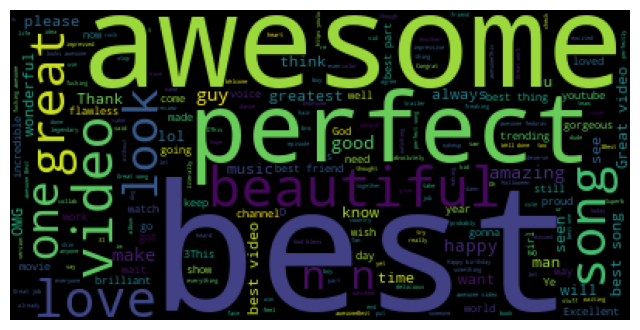

In [42]:
#Showing the positive and negative comments using imshow function
plt.figure(figsize=(8,12))
plt.imshow(positive)
plt.axis("off")

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

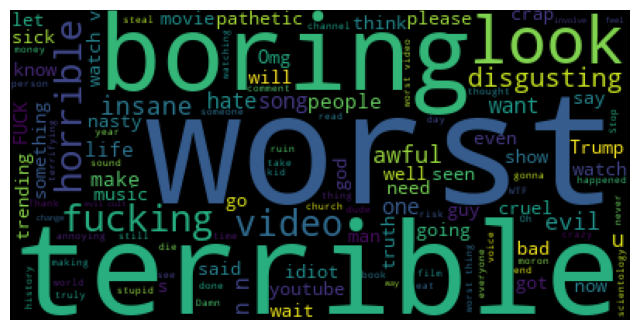

In [44]:
plt.figure(figsize=(8,12))
plt.imshow(negative)
plt.axis("off")